<a href="https://colab.research.google.com/github/tushitdave/Text_summarization/blob/main/Text_Chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center"> <h1>TEXT CHUNKING </h1></div>

<h2 style='text-align: right;'> Author : Tushit Dave </h2>

`Rule-Based Methods`

***Definition:*** Rule-based methods rely on explicit separators like punctuation or space characters, and sometimes employ complex tools such as regular expressions to divide text into segments.

***Explanation:*** In this approach, text is split into chunks based on predefined rules. For instance, sentences might be separated using periods, question marks, or exclamation marks. These methods work well for languages with well-defined punctuation rules. However, they might struggle with informal or complex sentence structures.

`Semantic Clustering Methods`

***Definition:*** Semantic clustering methods capitalize on the inherent meaning present in text to guide the chunking process.

***Explanation:*** This category employs techniques that consider the context and underlying semantics of the text. Machine learning algorithms may be used to identify natural divisions within the text. For instance, by understanding the relationships between words or phrases, these methods can group related information together. However, the effectiveness heavily relies on the quality of training data and the complexity of language nuances.

`Consequences and Considerations`

                                        `Diverse Approaches for Different Texts`

- Different types of texts might require different approaches. For instance, rule-based methods might be more suitable for highly structured content, while semantic clustering could excel with content containing subtle contextual cues.
Precision and Flexibility

- Rule-based methods offer precision, but they can be rigid and struggle with variations. Semantic clustering methods are more flexible and can handle nuances, but might lack the precision of rule-based techniques.

`Complexity and Resource Demand`

- Rule-based methods are straightforward to implement, requiring defined rules. On the other hand, semantic clustering methods demand advanced techniques like machine learning and ample training data.
Language and Context Understanding

- Semantic clustering methods attempt to understand language context, allowing them to adapt to various languages and evolving linguistic trends. Rule-based methods might face challenges in understanding such context.
Bias and Training Data

- Semantic clustering methods can capture biases present in the training data, potentially leading to biased summarization. Rule-based methods, while not immune to bias, might offer more controlled outputs.

***Summary:***In the realm of text summarization, the choice between rule-based and semantic clustering methods depends on factors like text complexity, linguistic nuances, and desired precision. A balanced consideration of these factors can help develop effective summarization solutions.

In [3]:
# First Install the pdf reader
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00


In [4]:
# !pip install nltk

In [5]:
# import nltk
# nltk.download('averaged_perceptron_tagger.pickle')

In [6]:
# Importing required libraries
import PyPDF2
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
# Helper Function to extract pages and text count and page number
def extract_text_and_page_count(pdf_file_path):
    with open(pdf_file_path, 'rb') as file:
        pdf = PyPDF2.PdfReader(file)
        page_count = len(pdf.pages)
        extracted_text = " ".join(page.extract_text() for page in pdf.pages)
    return extracted_text, page_count

# Extracting text, page count, and breaking text into sentences
pdf_file_path = "/content/hdr2021-22pdf_1.pdf"
extracted_text, page_count = extract_text_and_page_count(pdf_file_path)


In [46]:
print("length of extracted text : [{}] \nTotal number of pages in document : [{}]".format(len(extracted_text) , page_count))

length of extracted text : [1261372] 
Total number of pages in document : [320]


In [47]:
def remove_newlines(input_text):
    cleaned_text = input_text.replace('\n', ' ')
    return cleaned_text

In [48]:
extracted_text = remove_newlines(extracted_text)
# print(extracted_text)

In [49]:
sample = extracted_text[:2000]
print(sample)

Uncertain times, unsettled lives Shaping our future in a transforming world REPORT 2021/2022 Copyright @ 2022   By the United Nations Development Programme   1 UN Plaza, New Y ork, NY 10017 USA All rights reserved. No part of this publication may be reproduced,  stored in a retrieval system or transmitted, in any form or by means,  electronic, mechanical, photocopying, recording or otherwise, without  prior permission. Sales no.: E.22.III.B.4   ISBN: 9789211264517   eISBN: 9789210016407   Print ISSN: 0969-4501   Online ISSN: 2412-3129 A catalogue record for this book is available from the British Library and  Library of Congress General disclaimers.  The designations employed and the presentation  of the material in this publication do not imply the expression of any  opinion whatsoever on the part of the Human Development Report  Office (HDRO) of the United Nations Development Programme (UNDP)  concerning the legal status of any country, territory, city or area or of its  authorities,

### NLTK Sentence Tokenizer:

The Natural Language Toolkit (NLTK) offers a handy framework for breaking down text into individual sentences. This specialized sentence tokenizer segments a given text block into its constituent sentences, ready to be utilized for subsequent analysis.

In [50]:
def segment_text_to_sentences(input_text):
    sentence_segments = nltk.sent_tokenize(input_text)
    return sentence_segments

sentences = segment_text_to_sentences(extracted_text)

In [51]:
sentences[3]

': E.22.III.B.4   ISBN: 9789211264517   eISBN: 9789210016407   Print ISSN: 0969-4501   Online ISSN: 2412-3129 A catalogue record for this book is available from the British Library and  Library of Congress General disclaimers.'

In [15]:
total_characters = sum(len(sentence) for sentence in sentences)
mean_characters = total_characters / len(sentences)

print("Total number of sentences :{}".format(len(sentences)))
print("Total number of characters: {}".format(total_characters))
print("mean value of characters: {}". format(mean_characters))

Total number of sentences :9298
Total number of characters: 1249717
mean value of characters: 134.4070767907077


`Insufficient Semantic Comprehension:`

Similar to many tokenizers, the NLTK Sentence Tokenizer doesn't account for the semantic connections among sentences. Consequently, a context that extends across multiple sentences could potentially be overlooked during the tokenization procedure.

### Spacy Sentence Splitter

In [ ]:
!pip install spacy==3.4.1

In [ ]:
!python -m spacy download en_core_web_sm

In [18]:
sample_text = extracted_text[:1000000]

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(sample_text)
sentences = list(doc.sents)

In [20]:
total_characters = sum(len(sentence) for sentence in sentences)
mean_characters = total_characters / len(sentences)

print("Total number of sentences :{}".format(len(sentences)))
print("Total number of characters: {}".format(total_characters))
print("mean value of characters: {}". format(mean_characters))

Total number of sentences :8330
Total number of characters: 194393
mean value of characters: 23.336494597839135


### Langchain Character Text Splitter

In [21]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00


In [23]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [24]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 100,
    chunk_overlap  = 20,
    # Use length of the text as the size measure
    length_function = len,

)

# Create the chunks
texts = custom_text_splitter.create_documents([sample_text])

# Print the first two chunks
print(f'### Chunk 1: \n\n{texts[0].page_content}\n\n=====\n')
print(f'### Chunk 2: \n\n{texts[1].page_content}\n\n=====')

### Chunk 1: 

Uncertain times, unsettled lives Shaping our future in a transforming world REPORT 2021/2022

=====

### Chunk 2: 

REPORT 2021/2022 Copyright @ 2022   By the United Nations Development Programme   1 UN Plaza, New Y

=====


In [32]:
# Initialize the text splitter with custom parameters
custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 100,
    chunk_overlap  = 10,
    # Use length of the text as the size measure
    length_function = len,
    # Use only "\n\n" as the separator
    separators = ['\n']
)

# Create the chunks
custom_texts = custom_text_splitter.create_documents([sample_text])

# Print the first two chunks
print(f'### Chunk 1: \n\n{custom_texts[0].page_content}\n\n=====\n')
# print(f'### Chunk 2: \n\n{custom_texts[1].page_content}\n\n=====')

### Chunk 1: 

Uncertain times, unsettled lives Shaping our future in a transforming world REPORT 2021/2022 Copyright @ 2022   By the United Nations Development Programme   1 UN Plaza, New Y ork, NY 10017 USA All rights reserved. No part of this publication may be reproduced,  stored in a retrieval system or transmitted, in any form or by means,  electronic, mechanical, photocopying, recording or otherwise, without  prior permission. Sales no.: E.22.III.B.4   ISBN: 9789211264517   eISBN: 9789210016407   Print ISSN: 0969-4501   Online ISSN: 2412-3129 A catalogue record for this book is available from the British Library and  Library of Congress General disclaimers.  The designations employed and the presentation  of the material in this publication do not imply the expression of any  opinion whatsoever on the part of the Human Development Report  Office (HDRO) of the United Nations Development Programme (UNDP)  concerning the legal status of any country, territory, city or area or of it

In [27]:
# Print the sampled chunks
print("====   Sample chunks from 'Standard Parameters':   ====\n\n")
for i, chunk in enumerate(texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

print("====   Sample chunks from 'Custom Parameters':   ====\n\n")
for i, chunk in enumerate(custom_texts):
  if i < 4:
    print(f"### Chunk {i+1}: \n{chunk.page_content}\n")

====   Sample chunks from 'Standard Parameters':   ====


### Chunk 1: 
Uncertain times, unsettled lives Shaping our future in a transforming world REPORT 2021/2022

### Chunk 2: 
REPORT 2021/2022 Copyright @ 2022   By the United Nations Development Programme   1 UN Plaza, New Y

### Chunk 3: 
1 UN Plaza, New Y ork, NY 10017 USA All rights reserved. No part of this publication may be

### Chunk 4: 
publication may be reproduced,  stored in a retrieval system or transmitted, in any form or by

====   Sample chunks from 'Custom Parameters':   ====


### Chunk 1: 
Uncertain times, unsettled lives Shaping our future in a transforming world REPORT 2021/2022 Copyright @ 2022   By the United Nations Development Programme   1 UN Plaza, New Y ork, NY 10017 USA All rights reserved. No part of this publication may be reproduced,  stored in a retrieval system or transmitted, in any form or by means,  electronic, mechanical, photocopying, recording or otherwise, without  prior permission. Sales no.

In [33]:
total_characters = sum(len(texts) for text in texts)
mean_characters = total_characters / len(texts)

print("Total number of sentences :{}".format(len(texts)))
print("Total number of characters: {}".format(total_characters))
print("mean value of characters: {}". format(mean_characters))

Total number of sentences :12519
Total number of characters: 156725361
mean value of characters: 12519.0


In [34]:
total_characters = sum(len(custom_texts) for text in custom_texts)
mean_characters = total_characters / len(custom_texts)

print("Total number of sentences :{}".format(len(custom_texts)))
print("Total number of characters: {}".format(total_characters))
print("mean value of characters: {}". format(mean_characters))

Total number of sentences :1
Total number of characters: 1
mean value of characters: 1.0


In [35]:
# !pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=6f1a87428aa34e78b2b0a005daccb773b4128572574729aa70846453be135acc
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


### Adjacent Sequence clustering

In [53]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the sentences
embeddings = model.encode(sentences)

# Choose an appropriate number of clusters (here we choose 5 as an example)
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


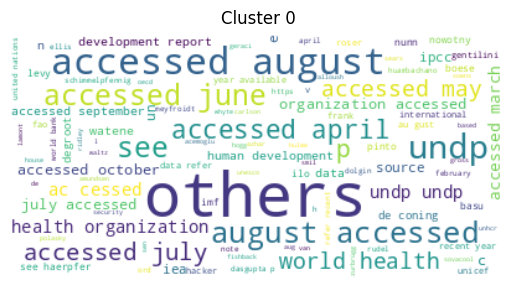

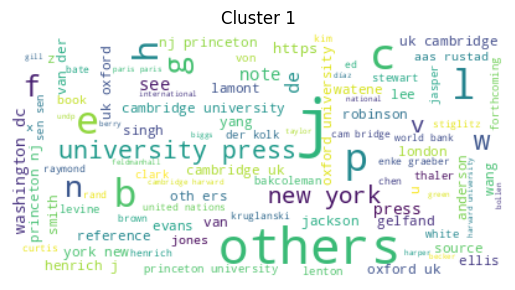

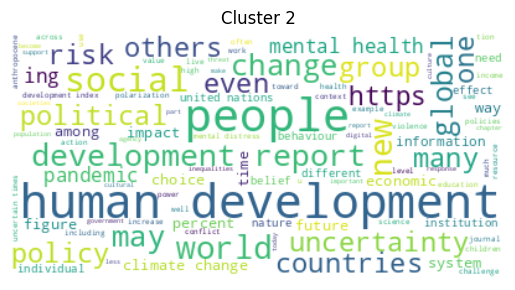

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

nltk.download('stopwords')

def generate_cluster_wordclouds(sentences, clusters, num_clusters):
    # Define a set of stopwords in English
    stop_words = set(stopwords.words('english'))

    # Define a function to clean sentences
    def clean_sentence(sentence):
        # Tokenize the sentence
        tokens = word_tokenize(sentence)
        # Convert tokens to lowercase
        tokens = [word.lower() for word in tokens]
        # Remove punctuation
        table = str.maketrans('', '', string.punctuation)
        stripped_tokens = [word.translate(table) for word in tokens]
        # Remove non-alphabetic tokens
        alphabetic_tokens = [word for word in stripped_tokens if word.isalpha()]
        # Filter out stopwords
        words = [word for word in alphabetic_tokens if word not in stop_words]
        return words

    # Generate Word Clouds for each cluster
    for i in range(num_clusters):
        # Get sentences belonging to the cluster
        cluster_sentences = [sentences[j] for j in range(len(sentences)) if clusters[j] == i]

        # Clean and preprocess sentences
        cleaned_sentences = [' '.join(clean_sentence(s)) for s in cluster_sentences]
        text = ' '.join(cleaned_sentences)

        # Generate and display Word Cloud
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Cluster {i}")
        plt.show()

# Example usage
generate_cluster_wordclouds(sentences, clusters, num_clusters)
